# EDS





Overview
Room Data is a Dataset of designed room spaces for a live project and therefore confidential. The Rows are each Room and features, the given parametrs like location, Front of House, Back Of House, etc

The steps are broadly:

Read and understand the data
Clean the data
Prepare the data for modelling
Modelling
Final analysis and recommendation

<ol>
  <li>Room Data - Analysis</li>
  <li>Create Derived Fatures based on Cost Function Formulas</li>
  <li>Normalize Derived Features</li>
  <li>Add Hyperparameters to each derived feature as/ domain heuristics</li>
  <li>Create Consolidated Cost Function</li>
  <li>Run ACO with Consolidated cost function as the distance function</li>
</ol>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_excel('sample_data/221129_A_RoomSchedule.xlsx',sheet_name='ARK_Room Schedule')
df.head()

,Element ID,Name,Number,Level,Base Offset,Department,Dyn_RoomParam_Services,Dyn_Location,X Value,Y Value,Z value,Area,Volume,Room_Visibility
0,50420111,ER,2113,02,0.0,Plant,NaN,"Point(X = 216974.415, Y = 46959.399, Z = 24985...",216974.415,46959.399,249850.0,0,0.86,BOH
1,50420610,RISER ACCESS,28,GF,0.0,Plant,NaN,"Point(X = 37449.932, Y = 46314.228, Z = 241100...",37449.932,46314.228,241100.0,0,0.00,BOH
2,50420690,JANITOR,7246,B2,150.0,Toilets and Personal Care,NaN,"Point(X = 101346.123, Y = 70816.177, Z = 22770...",101346.123,70816.177,227700.0,0,1.21,BOH
3,50420809,ER,3179,03,0.0,Plant,NaN,"Point(X = 217069.726, Y = 46789.768, Z = 25422...",217069.726,46789.768,254225.0,0,0.59,NaN
4,50420810,ER,2508,A2,0.0,Plant,NaN,"Point(X = 217305.544, Y = 46891.000, Z = 25275...",217305.544,46891.000,252750.0,0,1.17,NaN


In [ ]:
df.shape

(1666, 14)

In [ ]:
df.isnull().sum()

Element ID                   0
Name                         0
Number                       0
Level                        0
Base Offset                  0
Department                   0
Dyn_RoomParam_Services    1153
Dyn_Location                20
X Value                     20
Y Value                     20
Z value                     20
Area                         0
Volume                      24
Room_Visibility            144
dtype: int64

In [ ]:
#df=df.drop(['Unnamed: 16','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21'],axis=1)


df = df.dropna(subset=['Dyn_Location'])
df = df.dropna(subset=['Volume'])

df["Room_Visibility"].fillna("BOH", inplace = True)
print(df.isnull().sum())
df.shape


Element ID                   0
Name                         0
Number                       0
Level                        0
Base Offset                  0
Department                   0
Dyn_RoomParam_Services    1132
Dyn_Location                 0
X Value                      0
Y Value                      0
Z value                      0
Area                         0
Volume                       0
Room_Visibility              0
dtype: int64


(1642, 14)

In [ ]:
df.Department.unique()

array(['Plant', 'Toilets and Personal Care', 'BoH', 'Art Storage',
       'Circulation', 'Parking', 'Auditoria', 'Research & Education',
       'Office', 'Commercial', 'External',
       'Circulation & Permanent Galleries', 'Galleries'], dtype=object)

In [ ]:
df.Area.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71,
       72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 89, 90, 92,
       97, 99, 100, 101, 102, 104, 105, 106, 107, 109, 110, 111, 112, 113,
       114, 115, 117, 119, 121, 123, 124, 127, 131, 137, 138, 140, 141,
       145, 146, 149, 154, 156, 157, 158, 160, 168, 173, 174, 176, 185,
       191, 197, 202, 205, 206, 208, 212, 213, 219, 224, 226, 227, 228,
       231, 233, 234, 236, 237, 242, 246, 248, 251, 261, 265, 274, 276,
       288, 296, 298, 316, 318, 320, 324, 326, 332, 349, 350, 355, 360,
       372, 376, 381, 390, 410, 454, 457, 459, 461, 480, 489, 511, 563,
       566, 571, 588, 593, 645, 656, 673, 681, 686, 688, 690, 697, 717,
       742, 768, 773, 849, 855, 900, 923, 963, 9

In [ ]:
#dfaqa=df[df['Level']=='02']
#dfaqa

In [ ]:
df=df[(df['Area']!='Not')]

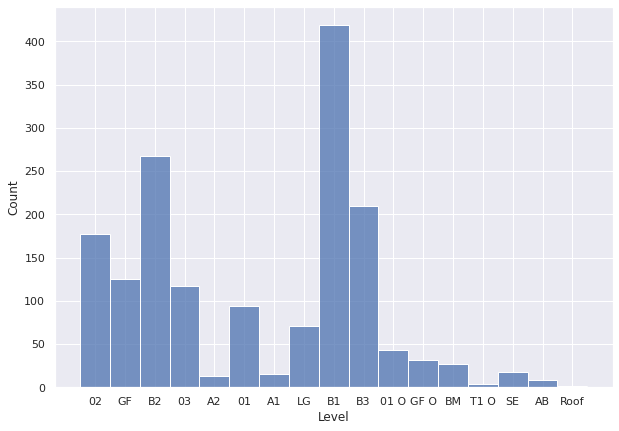

In [ ]:
plt_1 = plt.figure(figsize=(10, 7))
sns.set_theme(style="darkgrid")
sns.histplot(x='Level', data=df)
plt.show()

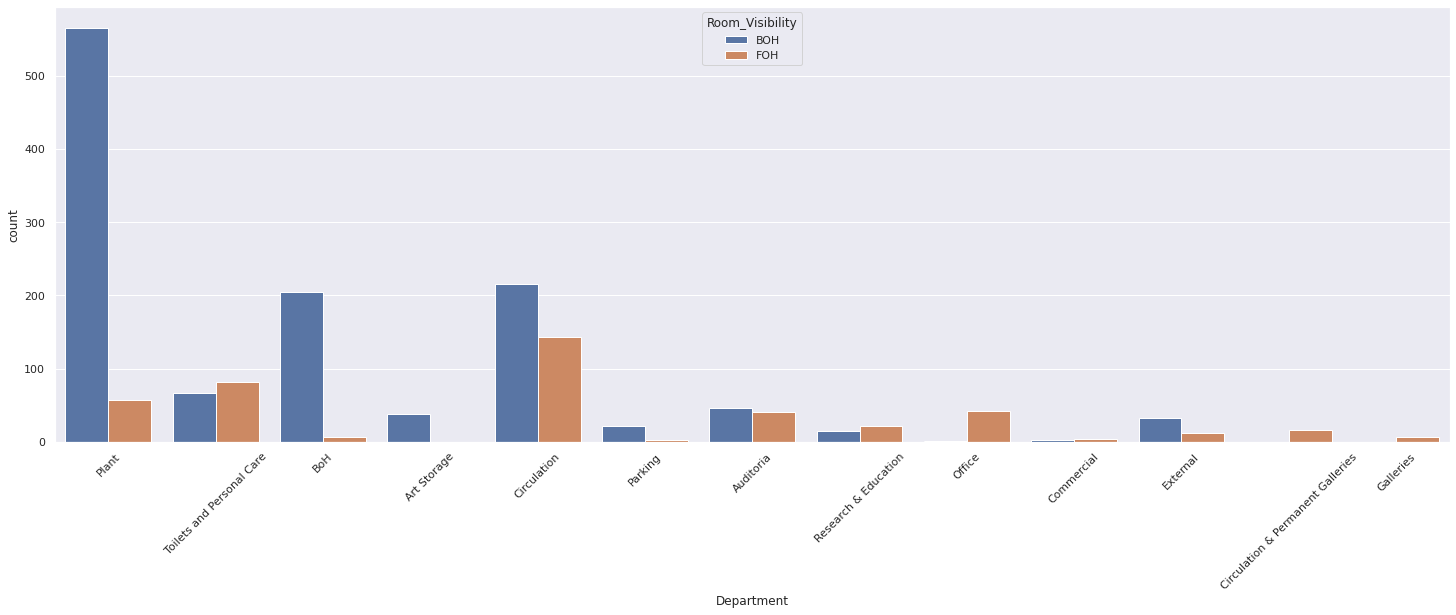

In [ ]:
plt.figure(figsize=(25,8))
ax=sns.countplot(x=df["Department"],hue='Room_Visibility',data=df)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
df.Department.unique()

array(['Plant', 'Toilets and Personal Care', 'BoH', 'Art Storage',
       'Circulation', 'Parking', 'Auditoria', 'Research & Education',
       'Office', 'Commercial', 'External',
       'Circulation & Permanent Galleries', 'Galleries'], dtype=object)

In [ ]:
df['Department'].replace(['Plant', 'Toilets and Personal Care', 'BoH', 'Art Storage',
       'Circulation', 'Parking', 'Auditoria', 'Research & Education',
       'Office', 'Commercial', 'External',
       'Circulation & Permanent Galleries', 'Galleries'],[0,1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)
df['Room_Visibility'].replace(['FOH', 'BOH'],[0, 1], inplace=True)
df['Level'].replace(['GF', '02','B1','Roof','01','03','B2','SE','LG','AB','B3','A2','A1','BM','GF O','01 O','T1 O'],[0, 8,-6,17,4,13,-13,-1,-3,2,-17,11,6,-9,-1,5,1], inplace=True)


In [ ]:
df['Area'] = df['Area'].apply(pd.to_numeric)
df['Level'] = df['Level'].apply(pd.to_numeric)
df['Room_Visibility'] = df['Room_Visibility'].apply(pd.to_numeric)
df['Department'] = df['Department'].apply(pd.to_numeric)
df_num=df.select_dtypes(include=np.number)
#df_num=df_num[(df_num['Level']==8)]
df_num

,Element ID,Number,Level,Base Offset,Department,X Value,Y Value,Z value,Area,Volume,Room_Visibility
0,50420111,2113,8,0.0,0,216974.415,46959.399,249850.0,0,0.86,1
1,50420610,28,0,0.0,0,37449.932,46314.228,241100.0,0,0.00,1
2,50420690,7246,-13,150.0,1,101346.123,70816.177,227700.0,0,1.21,1
3,50420809,3179,13,0.0,0,217069.726,46789.768,254225.0,0,0.59,1
4,50420810,2508,11,0.0,0,217305.544,46891.000,252750.0,0,1.17,1
...,...,...,...,...,...,...,...,...,...,...,...
1637,50690184,2250,8,0.0,11,166882.044,78085.379,249850.0,1154,5049.05,0
1638,50421077,6412,-6,0.0,11,174181.061,76362.180,234600.0,1183,3550.46,0
1639,50419776,79,0,0.0,11,166828.517,76236.824,241100.0,1266,5537.10,0
1640,50421032,7275,-13,0.0,5,157781.783,61519.031,227700.0,8149,52561.15,1


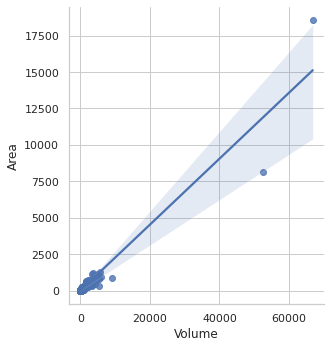

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x ='Volume', y ='Area', data = df_num)

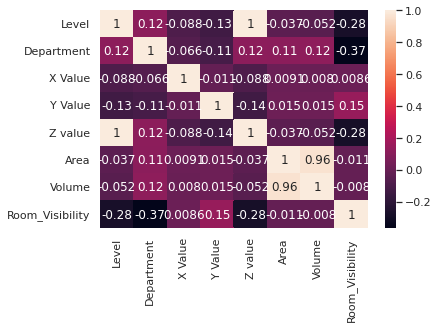

In [ ]:
df_numx=df_num.drop(['Element ID','Number','Base Offset'],axis=1)
#df_ar=df_num[['Area','Volume']]
sns.heatmap(df_numx.corr(), annot=True)

# Cost Formula

##### Euclidean Distance

In [ ]:
## euclidean distance
  x0 = 0
  x1 = 25
  y0 = 0
  y1 = 45
  z0 = 0
  z1 = 35

def Euclidean(x0,y0,z0,x1,y1,z1):

  D01sqr = (((x0-x1)**2 + (y0-y1)**2 + (z0-z1)**2))**(1/2)
  return D01sqr

IndentationError: ignored

##### **Level Elevation**

<br>
For a given ant m at a room i assessing path to room j  and Id(〖lvl〗_i ) an integer value assigned to the level as per the prefix to be assigned :
Equation 12 Room Numbering to TSP : Room Level Cost Function

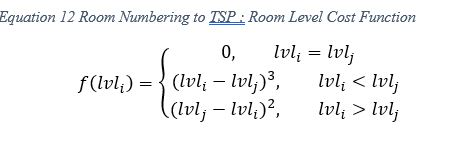


The Term to be added to the Cost function (after normalization): 
+λ_lvl.f(〖lvl〗_i)
In case of the level being same for the destination room, the value of the function is 0, else equal to the squared difference of the level values of the two rooms. More the difference, more the penalty on the distance function.  The squared distance is added to avoid absolute of the difference, a non-differentiable term. The penalty here will have to be very heavy to ensure that all rooms of one level are visited before going to the next level.

Further more if the difference is negative then the penalty is lesser (when shifting from one level to another, upward is preferred). The algorithm should first cover the rooms going upward before going below ground


Feature Scaling : <br>
 <br>

Normalization : Xchanged=(X−Xmin)/(Xmax−Xmin) {range btw 0,1}- <br>
Standardization : Xchanged=(X−μ)/σ  <br>

In [ ]:
#### FEATURE SCALING needed to help standardize the level values before input to ensure that a very high variable isnt added to the term. 

### Find max level

### Find min Level

### find corresponding values for level at node i and level at node j 

### Since values are in fractions we inverse the power to penalise the function correctly
def lvl_f(li,lj):
  if li == lj:
    return 0
  elif li < lj:
    return (li-lj)**(1/3)
  else:
    return (li-lj)**(1/2)


In [ ]:
lvl_f(.2,.4)

(0.2924017738212867+0.5064547284817317j)

In [ ]:
lvl_f(.2,.1)

0.31622776601683794

In [ ]:
lvl_f(.2,.2)

0

#### **FOH BOH** : Boolean

In [ ]:
###
def FoH_f1(FOH):
  if FOH == True:
    return 0
  else:
    return 1


In [ ]:
FoHx = 0
FoH_f1(FoHx)

1

### Department Function

In [ ]:
def Dep_f2(Dep1,Dep2):
  if Dep1==Dep2:
    return 0
  else:
    return 1

### Volume Fucntion

In [ ]:
def Vol_f3(v):
  return 1/(v+0.1)

Mu_Volume = 2

In [ ]:
Vol_f3(.2)

3.333333333333333

### Consolidated Cost Function

Defining the hyperparamters for each variable in the distance function as Mu_ParamName. Assigning a randomly chosen value based on priority for the parameter

In [ ]:
MuLOC = 3
MuLvl = 5
MuFOH = 4
MuDeptt = 3
MuVolume = 3


In [ ]:
def distance(city1: dict, city2: dict):
    dist = MuLOC*Euclidean(city1['x'],city2['x'], city1['y'] , city2['y']) + MuLvl*lvl_f(city1['Level'],city2['Level']) + MuFOH * FoH_f1(city2['FOH']) + MuDeptt*Dep_f2(city1['Department'],city2['Department']) + MuVolume * Vol_f3(city2['Volume'])
    return dist 



#**ACO - Solution 20221129_AV** 

In [ ]:
import random


class Graph(object):
    def __init__(self, cost_matrix: list, rank: int):
        """
        :param cost_matrix:
        :param rank: rank of the cost matrix
        """
        self.matrix = cost_matrix
        self.rank = rank
        # noinspection PyUnusedLocal
        self.pheromone = [[1 / (rank * rank) for j in range(rank)] for i in range(rank)]


class ACO(object):
    def __init__(self, ant_count: int, generations: int, alpha: float, beta: float, rho: float, q: int,
                 strategy: int):
        """
        :param ant_count:
        :param generations:
        :param alpha: relative importance of pheromone
        :param beta: relative importance of heuristic information
        :param rho: pheromone residual coefficient
        :param q: pheromone intensity
        :param strategy: pheromone update strategy. 0 - ant-cycle, 1 - ant-quality, 2 - ant-density
        """
        self.Q = q
        self.rho = rho
        self.beta = beta
        self.alpha = alpha
        self.ant_count = ant_count
        self.generations = generations
        self.update_strategy = strategy

    def _update_pheromone(self, graph: Graph, ants: list):
        for i, row in enumerate(graph.pheromone):
            for j, col in enumerate(row):
                graph.pheromone[i][j] *= self.rho
                for ant in ants:
                    graph.pheromone[i][j] += ant.pheromone_delta[i][j]

    # noinspection PyProtectedMember
    def solve(self, graph: Graph):
        """
        :param graph:
        """
        best_cost = float('inf')
        best_solution = []
        for gen in range(self.generations):
            # noinspection PyUnusedLocal
            ants = [_Ant(self, graph) for i in range(self.ant_count)]
            for ant in ants:
                for i in range(graph.rank - 1):
                    ant._select_next()
                ant.total_cost += graph.matrix[ant.tabu[-1]][ant.tabu[0]]
                if ant.total_cost < best_cost:
                    best_cost = ant.total_cost
                    best_solution = [] + ant.tabu
                # update pheromone
                ant._update_pheromone_delta()
            self._update_pheromone(graph, ants)
            # print('generation #{}, best cost: {}, path: {}'.format(gen, best_cost, best_solution))
        return best_solution, best_cost


class _Ant(object):
    def __init__(self, aco: ACO, graph: Graph):
        self.colony = aco
        self.graph = graph
        self.total_cost = 0.0
        self.tabu = []  # tabu list
        self.pheromone_delta = []  # the local increase of pheromone
        self.allowed = [i for i in range(graph.rank)]  # nodes which are allowed for the next selection
        self.eta = [[0 if i == j else 1 / graph.matrix[i][j] for j in range(graph.rank)] for i in
                    range(graph.rank)]  # heuristic information

        ############################ ---> Will have to start from biggest Volume on GF ###############################
        start = random.randint(0, graph.rank - 1)  # start from any node  
        self.tabu.append(start)
        self.current = start
        self.allowed.remove(start)

    def _select_next(self):
        denominator = 0
        for i in self.allowed:
            denominator += self.graph.pheromone[self.current][i] ** self.colony.alpha * self.eta[self.current][
                                                                                            i] ** self.colony.beta
        # noinspection PyUnusedLocal
        probabilities = [0 for i in range(self.graph.rank)]  # probabilities for moving to a node in the next step
        for i in range(self.graph.rank):
            try:
                self.allowed.index(i)  # test if allowed list contains i
                probabilities[i] = self.graph.pheromone[self.current][i] ** self.colony.alpha * \
                    self.eta[self.current][i] ** self.colony.beta / denominator
            except ValueError:
                pass  # do nothing
        # select next node by probability roulette
        selected = 0
        rand = random.random()
        for i, probability in enumerate(probabilities):
            rand -= probability
            if rand <= 0:
                selected = i
                break
        self.allowed.remove(selected)
        self.tabu.append(selected)
        self.total_cost += self.graph.matrix[self.current][selected]
        self.current = selected

    # noinspection PyUnusedLocal
    def _update_pheromone_delta(self):
        self.pheromone_delta = [[0 for j in range(self.graph.rank)] for i in range(self.graph.rank)]
        for _ in range(1, len(self.tabu)):
            i = self.tabu[_ - 1]
            j = self.tabu[_]
            if self.colony.update_strategy == 1:  # ant-quality system
                self.pheromone_delta[i][j] = self.colony.Q
            elif self.colony.update_strategy == 2:  # ant-density system
                # noinspection PyTypeChecker
                self.pheromone_delta[i][j] = self.colony.Q / self.graph.matrix[i][j]
   
            else:  # ant-cycle system
                self.pheromone_delta[i][j] = self.colony.Q / self.total_cost

In [ ]:
import operator

import matplotlib.pyplot as plt


def plot(points, path: list):
    x = []
    y = []
    for point in points:
        x.append(point[0])
        y.append(point[1])
    # noinspection PyUnusedLocal
    y = list(map(operator.sub, [max(y) for i in range(len(points))], y))
    plt.plot(x, y, 'co')

    for _ in range(1, len(path)):
        i = path[_ - 1]
        j = path[_]
        # noinspection PyUnresolvedReferences
        plt.arrow(x[i], y[i], x[j] - x[i], y[j] - y[i], color='r', length_includes_head=True)

    # noinspection PyTypeChecker
    plt.xlim(0, max(x) * 1.1)
    # noinspection PyTypeChecker
    plt.ylim(0, max(y) * 1.1)
    plt.show()

cost: 16170.543966619189, path: [11, 13, 12, 10, 22, 15, 4, 5, 6, 1, 3, 7, 8, 9, 18, 16, 17, 2, 20, 21, 19, 23, 24, 25, 27, 26, 29, 30, 28, 0, 14]


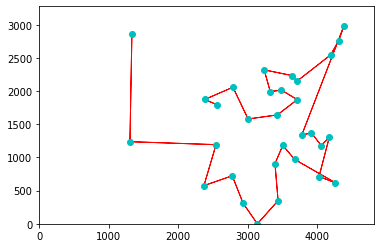

In [ ]:
import math

#from aco import ACO, Graph
#from plot import plot

##### To be altered t oCost Function #### 
def distance(city1: dict, city2: dict):
    return math.sqrt((city1['x'] - city2['x']) ** 2 + (city1['y'] - city2['y']) ** 2)


def main():
    cities = []
    points = []
    example1 = "/content/sample_data/data31.txt"
    with open(example1) as f:
        for line in f.readlines():
            city = line.split(' ')
            cities.append(dict(index=int(city[0]), x=int(city[1]), y=int(city[2])))
            points.append((int(city[1]), int(city[2])))
    cost_matrix = []
    rank = len(cities)
    for i in range(rank):
        row = []
        for j in range(rank):
            row.append(distance(cities[i], cities[j]))
        cost_matrix.append(row)
    aco = ACO(10, 100, 1.0, 10.0, 0.5, 10, 2)
    graph = Graph(cost_matrix, rank)
    path, cost = aco.solve(graph)
    print('cost: {}, path: {}'.format(cost, path))
    plot(points, path)

if __name__ == '__main__':
    main()

# **ACO** Earlier tries

## Basic Code from John Berroa

In [ ]:
#https://github.com/johnberroa/Ant-Colony-Optimization/blob/master/AntColonyOptimizer.py

import numpy as np
import matplotlib.pyplot as plt
import time
import random
import warnings

warnings.filterwarnings("ignore")


class AntColonyOptimizer:
    def __init__(self, ants, evaporation_rate, intensification, alpha=1.0, beta=0.0, beta_evaporation_rate=0,
                 choose_best=.1):
        """
        Ant colony optimizer.  Traverses a graph and finds either the max or min distance between nodes.
        :param ants: number of ants to traverse the graph
        :param evaporation_rate: rate at which pheromone evaporates
        :param intensification: constant added to the best path
        :param alpha: weighting of pheromone
        :param beta: weighting of heuristic (1/distance)
        :param beta_evaporation_rate: rate at which beta decays (optional)
        :param choose_best: probability to choose the best route
        """
        # Parameters
        self.ants = ants
        self.evaporation_rate = evaporation_rate
        self.pheromone_intensification = intensification
        self.heuristic_alpha = alpha
        self.heuristic_beta = beta
        self.beta_evaporation_rate = beta_evaporation_rate
        self.choose_best = choose_best

        # Internal representations
        self.pheromone_matrix = None
        self.heuristic_matrix = None
        self.probability_matrix = None

        self.map = None
        self.set_of_available_nodes = None

        # Internal stats
        self.best_series = []
        self.best = None
        self.fitted = False
        self.best_path = None
        self.fit_time = None

        # Plotting values
        self.stopped_early = False

    def __str__(self):
        string = "Ant Colony Optimizer"
        string += "\n--------------------"
        string += "\nDesigned to optimize either the minimum or maximum distance between nodes in a square matrix that behaves like a distance matrix."
        string += "\n--------------------"
        string += "\nNumber of ants:\t\t\t\t{}".format(self.ants)
        string += "\nEvaporation rate:\t\t\t{}".format(self.evaporation_rate)
        string += "\nIntensification factor:\t\t{}".format(self.pheromone_intensification)
        string += "\nAlpha Heuristic:\t\t\t{}".format(self.heuristic_alpha)
        string += "\nBeta Heuristic:\t\t\t\t{}".format(self.heuristic_beta)
        string += "\nBeta Evaporation Rate:\t\t{}".format(self.beta_evaporation_rate)
        string += "\nChoose Best Percentage:\t\t{}".format(self.choose_best)
        string += "\n--------------------"
        string += "\nUSAGE:"
        string += "\nNumber of ants influences how many paths are explored each iteration."
        string += "\nThe alpha and beta heuristics affect how much influence the pheromones or the distance heuristic weigh an ants' decisions."
        string += "\nBeta evaporation reduces the influence of the heuristic over time."
        string += "\nChoose best is a percentage of how often an ant will choose the best route over probabilistically choosing a route based on pheromones."
        string += "\n--------------------"
        if self.fitted:
            string += "\n\nThis optimizer has been fitted."
        else:
            string += "\n\nThis optimizer has NOT been fitted."
        return string

    def _initialize(self):
        """
        Initializes the model by creating the various matrices and generating the list of available nodes
        """
        assert self.map.shape[0] == self.map.shape[1], "Map is not a distance matrix!"
        num_nodes = self.map.shape[0]
        self.pheromone_matrix = np.ones((num_nodes, num_nodes))
        # Remove the diagonal since there is no pheromone from node i to itself
        self.pheromone_matrix[np.eye(num_nodes) == 1] = 0
        self.heuristic_matrix = 1 / self.map
        self.probability_matrix = (self.pheromone_matrix ** self.heuristic_alpha) * (
                self.heuristic_matrix ** self.heuristic_beta)  # element by element multiplcation
        self.set_of_available_nodes = list(range(num_nodes))

    def _reinstate_nodes(self):
        """
        Resets available nodes to all nodes for the next iteration
        """
        self.set_of_available_nodes = list(range(self.map.shape[0]))

    def _update_probabilities(self):
        """
        After evaporation and intensification, the probability matrix needs to be updated.  This function
        does that.
        """
        self.probability_matrix = (self.pheromone_matrix ** self.heuristic_alpha) * (
                self.heuristic_matrix ** self.heuristic_beta)

    def _choose_next_node(self, from_node):
        """
        Chooses the next node based on probabilities.  If p < p_choose_best, then the best path is chosen, otherwise
        it is selected from a probability distribution weighted by the pheromone.
        :param from_node: the node the ant is coming from
        :return: index of the node the ant is going to
        """
        numerator = self.probability_matrix[from_node, self.set_of_available_nodes]
        if np.random.random() < self.choose_best:
            next_node = np.argmax(numerator)
        else:
            denominator = np.sum(numerator)
            probabilities = numerator / denominator
            next_node = np.random.choice(range(len(probabilities)), p=probabilities)
        return next_node

    def _remove_node(self, node):
        self.set_of_available_nodes.remove(node)

    def _evaluate(self, paths, mode):
        """
        Evaluates the solutions of the ants by adding up the distances between nodes.
        :param paths: solutions from the ants
        :param mode: max or min
        :return: x and y coordinates of the best path as a tuple, the best path, and the best score
        """
        scores = np.zeros(len(paths))
        coordinates_i = []
        coordinates_j = []
        for index, path in enumerate(paths):
            score = 0
            coords_i = []
            coords_j = []
            for i in range(len(path) - 1):
                coords_i.append(path[i])
                coords_j.append(path[i + 1])
                score += self.map[path[i], path[i + 1]]
            scores[index] = score
            coordinates_i.append(coords_i)
            coordinates_j.append(coords_j)
        if mode == 'min':
            best = np.argmin(scores)
        elif mode == 'max':
            best = np.argmax(scores)
        return (coordinates_i[best], coordinates_j[best]), paths[best], scores[best]

    def _evaporation(self):
        """
        Evaporate some pheromone as the inverse of the evaporation rate.  Also evaporates beta if desired.
        """
        self.pheromone_matrix *= (1 - self.evaporation_rate)
        self.heuristic_beta *= (1 - self.beta_evaporation_rate)

    def _intensify(self, best_coords):
        """
        Increases the pheromone by some scalar for the best route.
        :param best_coords: x and y (i and j) coordinates of the best route
        """
        i = best_coords[0]
        j = best_coords[1]
        self.pheromone_matrix[i, j] += self.pheromone_intensification

    def fit(self, map_matrix, iterations=100, mode='min', early_stopping_count=20, verbose=True):
        """
        Fits the ACO to a specific map.  This was designed with the Traveling Salesman problem in mind.
        :param map_matrix: Distance matrix or some other matrix with similar properties
        :param iterations: number of iterations
        :param mode: whether to get the minimum path or maximum path
        :param early_stopping_count: how many iterations of the same score to make the algorithm stop early
        :return: the best score
        """
        if verbose: print("Beginning ACO Optimization with {} iterations...".format(iterations))
        self.map = map_matrix
        start = time.time()
        self._initialize()
        num_equal = 0

        for i in range(iterations):
            start_iter = time.time()
            paths = []
            path = []

            for ant in range(self.ants):
                current_node = self.set_of_available_nodes[np.random.randint(0, len(self.set_of_available_nodes))]
                start_node = current_node
                while True:
                    path.append(current_node)
                    self._remove_node(current_node)
                    if len(self.set_of_available_nodes) != 0:
                        current_node_index = self._choose_next_node(current_node)
                        current_node = self.set_of_available_nodes[current_node_index]
                    else:
                        break

                path.append(start_node)  # go back to start
                self._reinstate_nodes()
                paths.append(path)
                path = []

            best_path_coords, best_path, best_score = self._evaluate(paths, mode)

            if i == 0:
                best_score_so_far = best_score
            else:
                if mode == 'min':
                    if best_score < best_score_so_far:
                        best_score_so_far = best_score
                        self.best_path = best_path
                elif mode == 'max':
                    if best_score > best_score_so_far:
                        best_score_so_far = best_score
                        self.best_path = best_path

            if best_score == best_score_so_far:
                num_equal += 1
            else:
                num_equal = 0

            self.best_series.append(best_score)
            self._evaporation()
            self._intensify(best_path_coords)
            self._update_probabilities()

            if verbose: print("Best score at iteration {}: {}; overall: {} ({}s)"
                              "".format(i, round(best_score, 2), round(best_score_so_far, 2),
                                        round(time.time() - start_iter)))

            if best_score == best_score_so_far and num_equal == early_stopping_count:
                self.stopped_early = True
                print("Stopping early due to {} iterations of the same score.".format(early_stopping_count))
                break

        self.fit_time = round(time.time() - start)
        self.fitted = True

        if mode == 'min':
            self.best = self.best_series[np.argmin(self.best_series)]
            if verbose: print(
                "ACO fitted.  Runtime: {} minutes.  Best score: {}".format(self.fit_time // 60, self.best))
            return self.best
        elif mode == 'max':
            self.best = self.best_series[np.argmax(self.best_series)]
            if verbose: print(
                "ACO fitted.  Runtime: {} minutes.  Best score: {}".format(self.fit_time // 60, self.best))
            return self.best
        else:
            raise ValueError("Invalid mode!  Choose 'min' or 'max'.")

    def plot(self):
        """
        Plots the score over time after the model has been fitted.
        :return: None if the model isn't fitted yet
        """
        if not self.fitted:
            print("Ant Colony Optimizer not fitted!  There exists nothing to plot.")
            return None
        else:
            fig, ax = plt.subplots(figsize=(20, 15))
            ax.plot(self.best_series, label="Best Run")
            ax.set_xlabel("Iteration")
            ax.set_ylabel("Performance")
            ax.text(.8, .6,
                    'Ants: {}\nEvap Rate: {}\nIntensify: {}\nAlpha: {}\nBeta: {}\nBeta Evap: {}\nChoose Best: {}\n\nFit Time: {}m{}'.format(
                        self.ants, self.evaporation_rate, self.pheromone_intensification, self.heuristic_alpha,
                        self.heuristic_beta, self.beta_evaporation_rate, self.choose_best, self.fit_time // 60,
                        ["\nStopped Early!" if self.stopped_early else ""][0]),
                    bbox={'facecolor': 'gray', 'alpha': 0.8, 'pad': 10}, transform=ax.transAxes)
            ax.legend()
            plt.title("Ant Colony Optimization Results (best: {})".format(np.round(self.best, 2)))
            plt.show()

In [ ]:
entries=(0,4727,1205,6363,3657,3130,2414,563,463,5654,1713,1604,2368,2201,1290,1004,3833,2258,3419,2267,2957,720,1700,5279,2578,6076,3465,2654,3625,3115,1574,3951,1748,2142,6755,2383,3306,1029,3530,825,2188,4820,3489,1947,6835,1542,2379,3744
,4727,0,3588,2012,1842,6977,6501,5187,5028,2327,4148,4723,3635,3125,4907,3930,7463,6338,7243,5105,4043,4022,3677,2863,3106,1850,7173,6630,1204,6814,6001,3447,5253,2656,3123,6274,7183,5622,3085,4564,2756,1591,7027,6186,3472,5461,4390,2088
,1205,3588,0,5163,2458,3678,3071,1742,1444,4462,1184,1520,1498,1103,1501,951,4298,2903,3967,2169,2209,652,828,4136,1518,4873,3954,3254,2446,3581,2441,2960,1966,950,5564,2916,3878,2035,2482,1027,1395,3617,3891,2686,5661,2023,1867,2560
,6363,2012,5163,0,2799,8064,7727,6878,6581,1402,5366,5946,4679,4378,6225,5709,8417,7578,8296,6135,4802,5707,4982,2322,4178,320,8186,7800,2778,7859,7408,3763,6461,4223,1427,7451,8263,7131,3669,6011,4638,1681,7987,7502,1877,6758,5360,2844
,3657,1842,2458,2799,0,5330,4946,4200,3824,2012,2573,3157,1924,1580,3427,3179,5749,4793,5577,3409,2223,3066,2185,1860,1401,2491,5486,5035,894,5141,4611,1669,3677,1590,3113,4682,5533,4352,1252,3227,2426,1169,5313,4706,3241,3962,2651,304
,3130,6977,3678,8064,5330,0,743,3209,2670,6929,2831,2266,3407,3854,2178,4076,727,881,293,1930,3310,3672,3315,6199,3932,7745,365,482,5774,261,1659,4513,1746,4431,7910,769,207,2225,4435,2681,5053,6384,550,1224,7805,1670,2704,5230
,2414,6501,3071,7727,4946,743,0,2468,1952,6673,2380,1795,3051,3405,1604,3382,1469,168,1020,1681,3110,2993,2827,6009,3552,7412,1104,267,5300,821,916,4348,1270,3890,7698,332,900,1484,4185,2049,4415,6051,1219,482,7635,1054,2432,4884
,563,5187,1742,6878,4200,3209,2468,0,718,6203,2241,2051,2920,2762,1687,1304,3932,2331,3487,2669,3487,1175,2260,5840,3141,6596,3563,2728,4120,3240,1559,4507,2082,2658,7304,2512,3364,985,4091,1319,2544,5358,3632,1987,7391,1785,2879,4296
,463,5028,1444,6581,3824,2670,1952,718,0,5789,1602,1343,2330,2291,970,1451,3376,1796,2959,1951,2835,1112,1725,5346,2628,6285,3007,2193,3889,2661,1122,3920,1372,2391,6883,1927,2845,611,3543,676,2590,4993,3039,1486,6934,1112,2196,3876
,5654,2327,4462,1402,2012,6929,6673,6203,5789,0,4392,4947,3648,3501,5274,5183,7216,6535,7140,5022,3621,5077,4090,922,3207,1131,7014,6714,2437,6707,6477,2476,5432,3599,1102,6376,7121,6284,2497,5160,4318,937,6795,6507,1268,5773,4249,1914
,1713,4148,1184,5366,2573,2831,2380,2241,1602,4392,0,586,766,1029,883,2040,3353,2224,3100,1049,1246,1625,503,3841,1196,5054,3042,2488,2945,2676,2087,2331,1114,1650,5459,2132,3037,1958,1997,931,2513,3701,2923,2137,5459,1394,711,2534
,1604,4723,1520,5946,3157,2266,1795,2051,1343,4947,586,0,1299,1612,406,2208,2824,1639,2542,694,1586,1767,1050,4357,1770,5633,2498,1907,3520,2128,1558,2778,531,2171,6003,1552,2472,1538,2506,791,2912,4277,2403,1564,5983,827,892,3109
,2368,3635,1498,4679,1924,3407,3051,2920,2330,3648,766,1299,0,646,1642,2446,3840,2905,3655,1488,730,2096,697,3076,533,4363,3567,3122,2453,3219,2842,1592,1791,1480,4706,2772,3610,2721,1232,1656,2550,3001,3403,2860,4697,2126,756,1836
,2201,3125,1103,4378,1580,3854,3405,2762,2291,3501,1029,1612,646,0,1853,2026,4349,3247,4119,1997,1341,1753,606,3078,419,4070,4052,3517,1923,3690,3032,1866,2142,838,4593,3161,4060,2788,1380,1663,1932,2736,3915,3138,4647,2395,1351,1592
,1290,4907,1501,6225,3427,2178,1604,1687,970,5274,883,406,1642,1853,0,2029,2803,1438,2466,986,1987,1593,1253,4716,2072,5915,2454,1764,3710,2082,1204,3164,497,2287,6342,1419,2379,1134,2867,554,2885,4569,2405,1289,6338,555,1297,3406
,1004,3930,951,5709,3179,4076,3382,1304,1451,5183,2040,2208,2446,2026,2029,0,4759,3220,4368,2900,3151,442,1765,4960,2444,5443,4396,3610,2932,4034,2572,3891,2525,1590,6278,3313,4261,2033,3398,1476,1241,4287,4390,2928,6419,2428,2749,3337
,3833,7463,4298,8417,5749,727,1469,3932,3376,7216,3353,2824,3840,4349,2803,4759,0,1601,477,2359,3617,4345,3851,6433,4372,8098,370,1206,6267,726,2384,4754,2335,4991,8148,1452,609,2949,4752,3331,5687,6746,437,1948,8005,2334,3098,5618
,2258,6338,2903,7578,4793,881,168,2331,1796,6535,2224,1639,2905,3247,1438,3220,1601,0,1165,1563,2988,2829,2666,5882,3401,7263,1233,399,5138,923,794,4227,1117,3724,7565,286,1049,1348,4051,1881,4248,5903,1322,355,7508,887,2302,4736
,3419,7243,3967,8296,5577,293,1020,3487,2959,7140,3100,2542,3655,4119,2466,4368,477,1165,0,2170,3520,3965,3588,6393,4183,7977,202,767,6041,438,1932,4706,2027,4711,8107,1061,132,2503,4652,2972,5344,6617,486,1501,7989,1962,2939,5469
,2267,5105,2169,6135,3409,1930,1681,2669,1951,5022,1049,694,1488,1997,986,2900,2359,1563,2170,0,1430,2460,1547,4333,2019,5817,2079,1694,3910,1733,1813,2668,654,2694,6029,1366,2130,1991,2525,1474,3542,4455,1923,1641,5957,1071,777,3302
,2957,4043,2209,4802,2223,3310,3110,3487,2835,3621,1246,1586,730,1341,1987,3151,3617,2988,3520,1430,0,2779,1387,2905,1062,4482,3398,3119,2922,3087,3115,1240,1953,2175,4607,2796,3501,3119,1136,2173,3268,3136,3189,3029,4527,2355,711,2042
,720,4022,652,5707,3066,3672,2993,1175,1112,5077,1625,1767,2096,1753,1593,442,4345,2829,3965,2460,2779,0,1401,4781,2166,5427,3984,3212,2946,3620,2224,3603,2089,1496,6178,2906,3861,1719,3132,1040,1479,4211,3969,2553,6290,2012,2336,3189
,1700,3677,828,4982,2185,3315,2827,2260,1725,4090,503,1050,697,606,1253,1765,3851,2666,3588,1547,1387,1401,0,3621,903,4675,3537,2954,2475,3169,2427,2254,1578,1148,5177,2598,3521,2194,1833,1074,2054,3340,3423,2541,5213,1801,1077,2190
,5279,2863,4136,2322,1860,6199,6009,5840,5346,922,3841,4357,3076,3078,4716,4960,6433,5882,6393,4333,2905,4781,3621,0,2718,2042,6254,6024,2569,5966,5913,1687,4807,3384,1716,5699,6384,5787,1852,4687,4285,1272,6022,5892,1629,5178,3581,1639
,2578,3106,1518,4178,1401,3932,3552,3141,2628,3207,1196,1770,533,419,2072,2444,4372,3401,4183,2019,1062,2166,903,2718,0,3864,4097,3635,1932,3748,3274,1448,2284,1164,4286,3283,4136,3086,967,1973,2285,2507,3935,3331,4312,2589,1284,1340
,6076,1850,4873,320,2491,7745,7412,6596,6285,1131,5054,5633,4363,4070,5915,5443,8098,7263,7977,5817,4482,5427,4675,2042,3864,0,7866,7483,2515,7539,7101,3449,6146,3938,1375,7134,7944,6831,3349,5709,4397,1363,7667,7190,1798,6446,5041,2528
,3465,7173,3954,8186,5486,365,1104,3563,3007,7014,3042,2498,3567,4052,2454,4396,370,1233,202,2079,3398,3984,3537,6254,4097,7866,0,839,5973,374,2019,4569,1996,4669,7970,1085,305,2581,4532,2976,5339,6509,287,1581,7844,1974,2838,5369
,2654,6630,3254,7800,5035,482,267,2728,2193,6714,2488,1907,3122,3517,1764,3610,1206,399,767,1694,3119,3212,2954,6024,3635,7483,839,0,5427,558,1181,4349,1377,4044,7723,356,653,1744,4218,2241,4614,6121,955,743,7644,1231,2465,4957
,3625,1204,2446,2778,894,5774,5300,4120,3889,2437,2945,3520,2453,1923,3710,2932,6267,5138,6041,3910,2922,2946,2475,2569,1932,2515,5973,5427,0,5612,4824,2550,4050,1498,3476,5071,5980,4470,2096,3388,1911,1501,5831,4994,3704,4264,3209,1196
,3115,6814,3581,7859,5141,261,821,3240,2661,6707,2676,2128,3219,3690,2082,4034,726,923,438,1733,3087,3620,3169,5966,3748,7539,374,558,5612,0,1716,4280,1624,4298,7679,735,420,2263,4216,2606,4967,6179,400,1277,7567,1609,2501,5032
,1574,6001,2441,7408,4611,1659,916,1559,1122,6477,2087,1558,2842,3032,1204,2572,2384,794,1932,1813,3115,2224,2427,5913,3274,7101,2019,1181,4824,1716,0,4330,1180,3346,7545,1023,1808,578,4062,1438,3693,5763,2115,440,7537,763,2404,4603
,3951,3447,2960,3763,1669,4513,4348,4507,3920,2476,2331,2778,1592,1866,3164,3891,4754,4227,4706,2668,1240,3603,2254,1687,1448,3449,4569,4349,2550,4280,4330,0,3184,2510,3402,4031,4698,4281,533,3245,3612,2187,4339,4265,3296,3576,1941,1381
,1748,5253,1966,6461,3677,1746,1270,2082,1372,5432,1114,531,1791,2142,497,2525,2335,1117,2027,654,1953,2089,1578,4807,2284,6146,1996,1377,4050,1624,1180,3184,0,2685,6475,1022,1952,1341,2963,1050,3358,4787,1926,1086,6436,422,1244,3619
,2142,2656,950,4223,1590,4431,3890,2658,2391,3599,1650,2171,1480,838,2287,1590,4991,3724,4711,2694,2175,1496,1148,3384,1164,3938,4669,4044,1498,4298,3346,2510,2685,0,4697,3693,4636,2975,1981,1909,1124,2718,4565,3548,4830,2839,2140,1751
,6755,3123,5564,1427,3113,7910,7698,7304,6883,1102,5459,6003,4706,4593,6342,6278,8148,7565,8107,6029,4607,6178,5177,1716,4286,1375,7970,7723,3476,7679,7545,3402,6475,4697,0,7393,8097,7370,3515,6249,5379,2001,7738,7556,461,6829,5267,3013
,2383,6274,2916,7451,4682,769,332,2512,1927,6376,2132,1552,2772,3161,1419,3313,1452,286,1061,1366,2796,2906,2598,5699,3283,7134,1085,356,5071,735,1023,4031,1022,3693,7393,0,965,1542,3883,1913,4286,5772,1121,600,7322,902,2128,4608
,3306,7183,3878,8263,5533,207,900,3364,2845,7121,3037,2472,3610,4060,2379,4261,609,1049,132,2130,3501,3861,3521,6384,4136,7944,305,653,5980,420,1808,4698,1952,4636,8097,965,0,2380,4629,2877,5250,6583,570,1380,7986,1866,2904,5432
,1029,5622,2035,7131,4352,2225,1484,985,611,6284,1958,1538,2721,2788,1134,2033,2949,1348,2503,1991,3119,1719,2194,5787,3086,6831,2581,1744,4470,2263,578,4281,1341,2975,7370,1542,2380,0,3952,1127,3197,5518,2658,1002,7395,951,2429,4380
,3530,3085,2482,3669,1252,4435,4185,4091,3543,2497,1997,2506,1232,1380,2867,3398,4752,4051,4652,2525,1136,3132,1833,1852,967,3349,4532,4218,2096,4216,4062,533,2963,1981,3515,3883,4629,3952,0,2873,3080,2012,4324,4046,3478,3328,1755,1000
,825,4564,1027,6011,3227,2681,2049,1319,676,5160,931,791,1656,1663,554,1476,3331,1881,2972,1474,2173,1040,1074,4687,1973,5709,2976,2241,3388,2606,1438,3245,1050,1909,6249,1913,2877,1127,2873,0,2374,4392,2943,1659,6285,1012,1563,3254
,2188,2756,1395,4638,2426,5053,4415,2544,2590,4318,2513,2912,2550,1932,2885,1241,5687,4248,5344,3542,3268,1479,2054,4285,2285,4397,5339,4614,1911,4967,3693,3612,3358,1124,5379,4286,5250,3197,3080,2374,0,3386,5284,3997,5585,3386,3125,2664
,4820,1591,3617,1681,1169,6384,6051,5358,4993,937,3701,4277,3001,2736,4569,4287,6746,5903,6617,4455,3136,4211,3340,1272,2507,1363,6509,6121,1501,6179,5763,2187,4787,2718,2001,5772,6583,5518,2012,4392,3386,0,6314,5837,2205,5095,3680,1169
,3489,7027,3891,7987,5313,550,1219,3632,3039,6795,2923,2403,3403,3915,2405,4390,437,1322,486,1923,3189,3969,3423,6022,3935,7667,287,955,5831,400,2115,4339,1926,4565,7738,1121,570,2658,4324,2943,5284,6314,0,1676,7603,1964,2662,5184
,1947,6186,2686,7502,4706,1224,482,1987,1486,6507,2137,1564,2860,3138,1289,2928,1948,355,1501,1641,3029,2553,2541,5892,3331,7190,1581,743,4994,1277,440,4265,1086,3548,7556,600,1380,1002,4046,1659,3997,5837,1676,0,7521,744,2325,4670
,6835,3472,5661,1877,3241,7805,7635,7391,6934,1268,5459,5983,4697,4647,6338,6419,8005,7508,7989,5957,4527,6290,5213,1629,4312,1798,7844,7644,3704,7567,7537,3296,6436,4830,461,7322,7986,7395,3478,6285,5585,2205,7603,7521,0,6805,5208,3102
,1542,5461,2023,6758,3962,1670,1054,1785,1112,5773,1394,827,2126,2395,555,2428,2334,887,1962,1071,2355,2012,1801,5178,2589,6446,1974,1231,4264,1609,763,3576,422,2839,6829,902,1866,951,3328,1012,3386,5095,1964,744,6805,0,1644,3928
,2379,4390,1867,5360,2651,2704,2432,2879,2196,4249,711,892,756,1351,1297,2749,3098,2302,2939,777,711,2336,1077,3581,1284,5041,2838,2465,3209,2501,2404,1941,1244,2140,5267,2128,2904,2429,1755,1563,3125,3680,2662,2325,5208,1644,0,2532
,3744,2088,2560,2844,304,5230,4884,4296,3876,1914,2534,3109,1836,1592,3406,3337,5618,4736,5469,3302,2042,3189,2190,1639,1340,2528,5369,4957,1196,5032,4603,1381,3619,1751,3013,4608,5432,4380,1000,3254,2664,1169,5184,4670,3102,3928,2532,0)
some_distance_matrix=np.reshape(entries,(48,48))
print(some_distance_matrix)


[[   0 4727 1205 ... 1542 2379 3744]
 [4727    0 3588 ... 5461 4390 2088]
 [1205 3588    0 ... 2023 1867 2560]
 ...
 [1542 5461 2023 ...    0 1644 3928]
 [2379 4390 1867 ... 1644    0 2532]
 [3744 2088 2560 ... 3928 2532    0]]


Beginning ACO Optimization with 200 iterations...
Best score at iteration 0: 37928.0; overall: 37928.0 (0s)
Best score at iteration 1: 36501.0; overall: 36501.0 (0s)
Best score at iteration 2: 36501.0; overall: 36501.0 (0s)
Best score at iteration 3: 36501.0; overall: 36501.0 (0s)
Best score at iteration 4: 36501.0; overall: 36501.0 (0s)
Best score at iteration 5: 36501.0; overall: 36501.0 (0s)
Best score at iteration 6: 36501.0; overall: 36501.0 (0s)
Best score at iteration 7: 36501.0; overall: 36501.0 (0s)
Best score at iteration 8: 36501.0; overall: 36501.0 (0s)
Best score at iteration 9: 36501.0; overall: 36501.0 (0s)
Best score at iteration 10: 36501.0; overall: 36501.0 (0s)
Best score at iteration 11: 36501.0; overall: 36501.0 (0s)
Best score at iteration 12: 36501.0; overall: 36501.0 (0s)
Best score at iteration 13: 36501.0; overall: 36501.0 (0s)
Best score at iteration 14: 36501.0; overall: 36501.0 (0s)
Best score at iteration 15: 36501.0; overall: 36501.0 (0s)
Best score at it

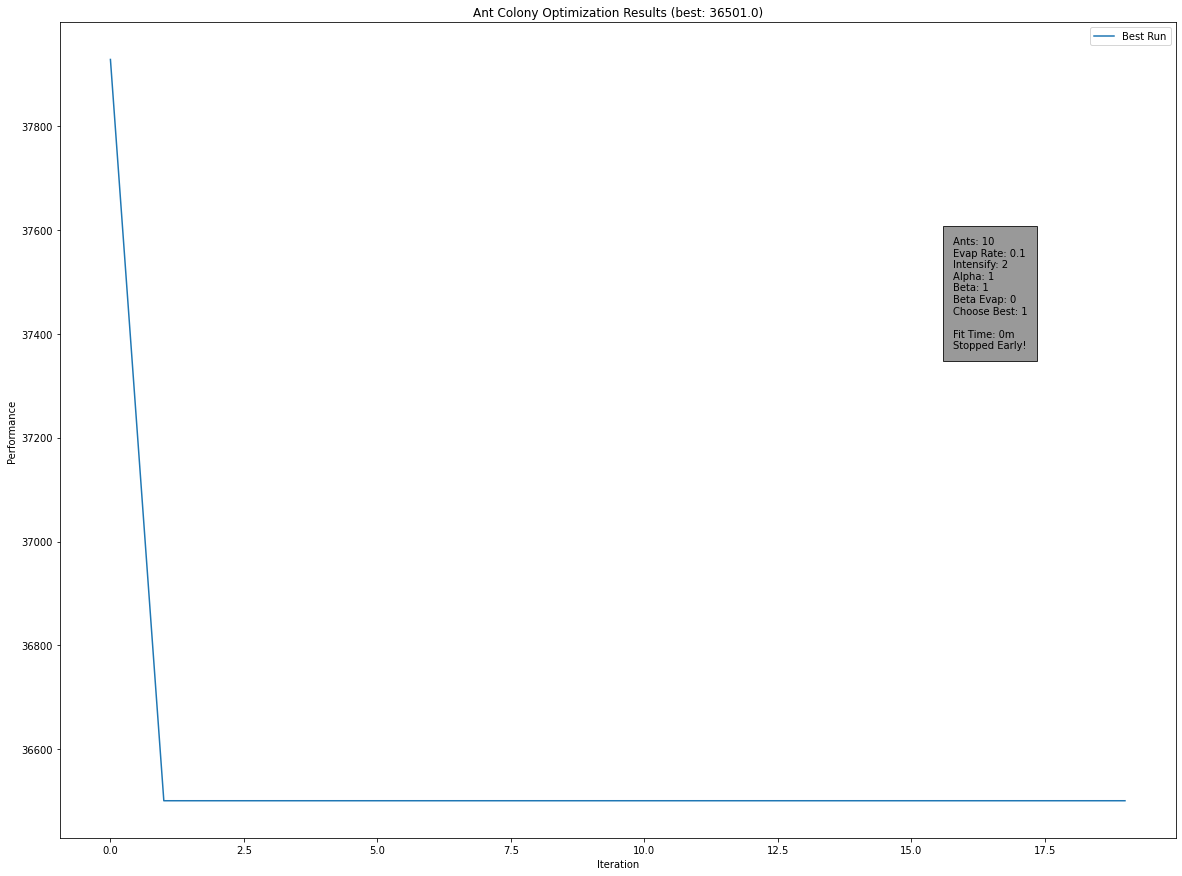

In [ ]:
problem = some_distance_matrix
optimizer = AntColonyOptimizer(ants=10, evaporation_rate=.1, intensification=2, alpha=1, beta=1,
                               beta_evaporation_rate=0, choose_best=1)
 
best = optimizer.fit(problem, 200)
optimizer.plot()

## Trial Run for Rooms Data Basic

In [ ]:
import pandas as pd

from google.colab import drive
#drive.mount('/content/sample_data')
df = pd.read_csv('sample_data/RoomData_20211213.csv') 
df


,Dyn_ElementId,Unnamed: 1,X,Y,Z,Room_Number,Room_Name,Level_Id,Department,Workset,Room_Number2,Room_Name2,Level,Upper_Limit,Limit_Offset,UnboundHeight,Department2,Dyn_FuncZone,Dyn_FuncZn_Abb
0,Dyn_ElementId-5062106,5062106.0,126172.044,95910.879,241100.0,1332,TEMPORARY GALLERY 03,311,Galleries,Workset-44612,Number-1332,Name-TEMPORARY GALLERY 03,Level-GF,"Upper Limit-Level(Name=02, Elevation=250350)",Limit Offset--246.412767615,Unbounded Height-8503.58723239,Department-Galleries,Dyn_FunctionalZone_Name-TEMPORARY GALLERIES,Dyn_FunctionalZone_Abb-TG
1,Dyn_ElementId-5062114,5062114.0,111528.090,82446.875,241100.0,1340,STAIR D01,311,Circulation,Workset-44612,Number-1340,Name-STAIR D01,Level-GF,"Upper Limit-Level(Name=02, Elevation=250350)",Limit Offset-4603.89818397,Unbounded Height-13353.8981840,Department-Circulation,Dyn_FunctionalZone_Name-EXTERNAL AREAS,Dyn_FunctionalZone_Abb-EX
2,Dyn_ElementId-5062134,5062134.0,214932.044,108860.879,234600.0,1360,STAIR E02,419525,Circulation,Workset-44612,Number-1360,Name-STAIR E02,Level-B1,"Upper Limit-Level(Name=GF, Elevation=241600)",Limit Offset--1000.0,Unbounded Height-5500.00000000,Department-Circulation,"Dyn_FunctionalZone_Name-RESEARCH & EDUCATION, ...","Dyn_FunctionalZone_Abb-RE, RE"
3,Dyn_ElementId-5062137,5062137.0,212515.348,105656.840,238000.0,1363,FIRE LOBBY,1404832,Circulation,Workset-44612,Number-1363,Name-FIRE LOBBY,Level-Lower GF,"Upper Limit-Level(Name=Lower GF, Elevation=238...",Limit Offset-2554.59805884,Unbounded Height-3254.59805884,Department-Circulation,Dyn_FunctionalZone_Name-STUDIOS,Dyn_FunctionalZone_Abb-ST
4,Dyn_ElementId-5062145,5062145.0,94932.044,80635.879,241100.0,1371,VESTIBULE,311,Circulation,Workset-44612,Number-1371,Name-VESTIBULE,Level-GF,"Upper Limit-Level(Name=GF, Elevation=241600)",Limit Offset-4246.21202518,Unbounded Height-4246.21202518,Department-Circulation,Dyn_FunctionalZone_Name-TEMPORARY GALLERIES,Dyn_FunctionalZone_Abb-TG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,Dyn_ElementId-10919091,10919091.0,48923.374,38847.220,241100.0,4122,WR,311,Circulation,Workset-44612,Number-4122,Name-WR,Level-GF,"Upper Limit-Level(Name=GF, Elevation=241600)",Limit Offset-5887.27091172,Unbounded Height-6989.34620898,Department-Circulation,Dyn_FunctionalZone_Name-OFFICES,"Dyn_FunctionalZone_Abb-TG, TG"
1318,Dyn_ElementId-7503617,7503617.0,81963.483,77002.285,227700.0,4123,SECURE ROOM,970236,Art Storage,Workset-1206,Number-4123,Name-SECURE ROOM,Level-B2,"Upper Limit-Level(Name=B2, Elevation=228200)",Limit Offset-5289.35787557,Unbounded Height-5289.35787557,Department-Art Storage,"Dyn_FunctionalZone_Name-STAFF FACILITIES, STAF...","Dyn_FunctionalZone_Abb-SF, SF"
1319,Dyn_ElementId-7537295,7537295.0,102877.235,50780.087,227700.0,4124,CIRCULATION SPACE,970236,Art Storage,Workset-1206,Number-4124,Name-CIRCULATION SPACE,Level-B2,"Upper Limit-Level(Name=B2, Elevation=228200)",Limit Offset-5284.19970071,Unbounded Height-5284.19970071,Department-Art Storage,"Dyn_FunctionalZone_Name-STAFF FACILITIES, STAF...","Dyn_FunctionalZone_Abb-SF, SF"
1320,Dyn_ElementId-8620436,8620436.0,105208.885,71535.241,245475.0,4125,STORAGE,969509,BoH,Workset-1206,Number-4125,Name-STORAGE,Level-01,"Upper Limit-Level(Name=01, Elevation=245975)",Limit Offset-3007.84812077,Unbounded Height-3007.84812077,Department-BoH,Dyn_FunctionalZone_Name-FOH & PERMENANT GALLER...,"Dyn_FunctionalZone_Abb-PG, PG, EX"


In [ ]:
df_num=df.select_dtypes([np.number])
df_num

,Unnamed: 1,X,Y,Z,Level_Id
0,5062106.0,126172.044,95910.879,241100.0,311
1,5062114.0,111528.090,82446.875,241100.0,311
2,5062134.0,214932.044,108860.879,234600.0,419525
3,5062137.0,212515.348,105656.840,238000.0,1404832
4,5062145.0,94932.044,80635.879,241100.0,311
...,...,...,...,...,...
1317,10919091.0,48923.374,38847.220,241100.0,311
1318,7503617.0,81963.483,77002.285,227700.0,970236
1319,7537295.0,102877.235,50780.087,227700.0,970236
1320,8620436.0,105208.885,71535.241,245475.0,969509


In [ ]:
df_num=df_num.drop(['Unnamed: 1', 'Level_Id'], axis=1)
df_num

,X,Y,Z
0,126172.044,95910.879,241100.0
1,111528.090,82446.875,241100.0
2,214932.044,108860.879,234600.0
3,212515.348,105656.840,238000.0
4,94932.044,80635.879,241100.0
...,...,...,...
1317,48923.374,38847.220,241100.0
1318,81963.483,77002.285,227700.0
1319,102877.235,50780.087,227700.0
1320,105208.885,71535.241,245475.0


In [ ]:
df_num=df_num.dropna()

In [ ]:
df_num=df_num.reset_index()
df_num

,index,X,Y,Z
0,0,126172.044,95910.879,241100.0
1,1,111528.090,82446.875,241100.0
2,2,214932.044,108860.879,234600.0
3,3,212515.348,105656.840,238000.0
4,4,94932.044,80635.879,241100.0
...,...,...,...,...
1111,1317,48923.374,38847.220,241100.0
1112,1318,81963.483,77002.285,227700.0
1113,1319,102877.235,50780.087,227700.0
1114,1320,105208.885,71535.241,245475.0


In [ ]:
df_num=df_num.drop(['index'], axis=1)
df_num

,X,Y,Z
0,126172.044,95910.879,241100.0
1,111528.090,82446.875,241100.0
2,214932.044,108860.879,234600.0
3,212515.348,105656.840,238000.0
4,94932.044,80635.879,241100.0
...,...,...,...
1111,48923.374,38847.220,241100.0
1112,81963.483,77002.285,227700.0
1113,102877.235,50780.087,227700.0
1114,105208.885,71535.241,245475.0


In [ ]:
import math
eu_distance_lst=[]
for x1,y1,z1 in zip(df_num['X'], df_num['Y'],df_num['Z']):
  for x2,y2,z2 in zip(df_num['X'], df_num['Y'],df_num['Z']):
    eu_distance_lst.append(math.sqrt((x2-x1)**2 + (y2-y1)**2+(z2-z1)**2))


ValueError: ignored

In [ ]:
eu_distance_matrix=np.reshape(eu_distance_lst,(1116,1116))
print(eu_distance_matrix)

[[     0.          19892.83269085  89934.92147103 ...  52526.15075268
   32446.36170923  50600.11005932]
 [ 19892.83269085      0.         106922.06184949 ...  35456.77304082
   13346.78738056  32734.53561001]
 [ 89934.92147103 106922.06184949      0.         ... 126401.22079859
  116407.2184104  126420.64940853]
 ...
 [ 52526.15075268  35456.77304082 126401.22079859 ...      0.
   27425.60180354  17779.19739904]
 [ 32446.36170923  13346.78738056 116407.2184104  ...  27425.60180354
       0.          20503.93347519]
 [ 50600.11005932  32734.53561001 126420.64940853 ...  17779.19739904
   20503.93347519      0.        ]]


In [ ]:
from scipy.spatial.distance import cdist
#from scipy.spatial.distance import squareform
#df_numx=(cdist(df_num,df_num,'euclidean'))
#df_numx

In [ ]:
#df_numx = df_numx.astype('int32')
#print(df_numx.dtype)

In [ ]:
eu_distance_matrix.shape

(1116, 1116)

Beginning ACO Optimization with 1500 iterations...
Best score at iteration 0: 15168466.31; overall: 15168466.31 (1s)
Best score at iteration 1: 15135768.87; overall: 15135768.87 (1s)
Best score at iteration 2: 15191338.5; overall: 15135768.87 (1s)
Best score at iteration 3: 15120709.54; overall: 15120709.54 (1s)
Best score at iteration 4: 15121768.02; overall: 15120709.54 (1s)
Best score at iteration 5: 15114254.09; overall: 15114254.09 (1s)
Best score at iteration 6: 15167690.06; overall: 15114254.09 (1s)
Best score at iteration 7: 15096272.48; overall: 15096272.48 (1s)
Best score at iteration 8: 15096418.77; overall: 15096272.48 (1s)
Best score at iteration 9: 15096418.77; overall: 15096272.48 (1s)
Best score at iteration 10: 15096418.77; overall: 15096272.48 (1s)
Best score at iteration 11: 15096418.77; overall: 15096272.48 (1s)
Best score at iteration 12: 15096418.77; overall: 15096272.48 (1s)
Best score at iteration 13: 15096418.77; overall: 15096272.48 (1s)
Best score at iteratio

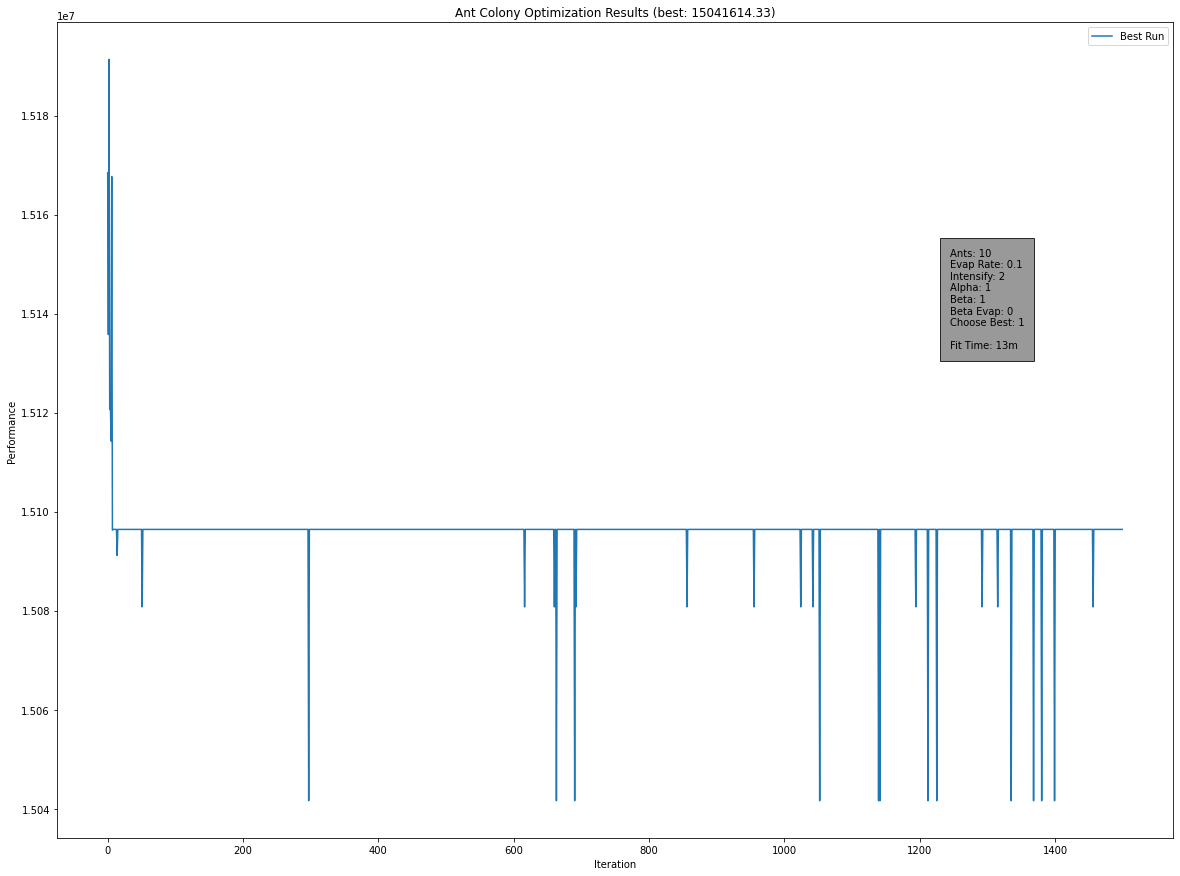

In [ ]:
problem = eu_distance_matrix
optimizer = AntColonyOptimizer(ants=10, evaporation_rate=.1, intensification=2, alpha=1, beta=1,
                               beta_evaporation_rate=0, choose_best=1)
 
best =optimizer.fit(problem,1500)
optimizer.plot()

## GODOT ENGINE CODE 

#### Sample Code 

https://github.com/hsaikia/TravellingSalesmanGodot/blob/main/scripts/World.gd





```
extends Node2D 

var rng = RandomNumberGenerator.new() 
var node_scene = preload("res://scenes/ACONode.tscn")
var edge_scene = preload("res://scenes/ACOPath.tscn") 
var nodes = [] 
var edges = [] 
var num_nodes = 20 
var node_radius = 50 
var edge_width = 100 
var edge_scale = 0.1 
var weights = [] 
var distances = [] 
var running = false 
var best_len = 1000000000
var alpha = 1.0 # pheromone weight 
var beta = 2.0 # greedy weight

func run_aco_batch(batch_size: int): 
```


	running = false
	####### Evaporate
	for i in range(num_nodes):
		for j in range(num_nodes):
			weights[i][j] *= 0.999

	var new_weights = weights.duplicate(true)
	####### Run the whole batch
	for _i in range(batch_size):
		var ret = get_random_path_from(rng.randi_range(0, num_nodes - 1))
		var path = ret[0]
		var l = ret[1]
		
		if l < best_len:
			best_len = l
		var diff = l - best_len + 0.05
		var w = 0.01 / diff
		for i in range(num_nodes + 1):
			var idx1 = path[i % num_nodes]
			var idx2 = path[(i + 1) % num_nodes]
			new_weights[idx1][idx2] += w
			new_weights[idx2][idx1] += w

	####### Update the weights after normalizing
	for i in range(num_nodes):
		var n_sum = 0.0
		for j in range(num_nodes):
			if i == j:
				continue
			n_sum += new_weights[i][j]
		for j in range(num_nodes):
			####### multiplying by 2 since every node has two neighbors eventually
			weights[i][j] = 2 * new_weights[i][j] / n_sum
	add_edges()		
	draw_stuff()
	running = true
	return best_len



```
func get_transition_probability(idx1 : int, idx2 : int) -> float: 
return pow(weights[idx1][idx2], alpha) * pow(distances[idx1][idx2], -beta) 

func get_random_path_from(idx : int): 
```


	var path = [] </br>
	var dist = 0.0 </br>
	path.append(idx) </br>
	var curr_idx = idx </br>
	while len(path) < num_nodes: </br>
		var n_sum = 0.0; </br>
		var possible_next = [] </br>
		for n in range(num_nodes): </br>
			if path.has(n): # already visited </br>
				continue </br>
			n_sum += get_transition_probability(curr_idx, n) </br>
			possible_next.append(n) </br>
		var r = rng.randf_range(0.0, n_sum) </br> 
		var x = 0.0 </br> 
		for nn in possible_next: </br>
			x += get_transition_probability(curr_idx, nn) </br>
			if r <= x: </br>
				dist += distances[curr_idx][nn] </br>
				curr_idx = nn </br>
				path.append(nn) </br>
				break </br>
	dist += distances[curr_idx][idx] </br>
	return [path, dist] </br>

func add_node(x, y):
	var node_var = node_scene.instance()
	node_var.set_position(Vector2(x, y))
	nodes.append(node_var)

func force(me : Vector2, other : Vector2, attractive : bool) -> Vector2:
	###### constant attraction
	var ka = 0.1 * num_nodes
	####### repulsion
	var kr = -10000
	var eps = 0.001
	var ret = 1.0 / eps
	var dist_squared = (me - other).length_squared()
	#######print("Dist ", dist_squared)
	if dist_squared > eps :
		ret = 1.0 / dist_squared
	if attractive:
		ret = ka
	else:
		ret *= kr
	var ret_vec = ret * (other - me).normalized()
	return ret_vec

```
use a force directed layout


func spread_nodes(num_iter : int) -> void:
```

	###### all nodes are attracted to the center
	###### and repelled by each other
	for _i in range(num_iter):
		var center = Vector2(0, 0)
		for node in nodes:
			center += node.position
		center /= num_nodes
		var new_pos = []
		for i in range(num_nodes):
			new_pos.append(nodes[i].position)
			for j in range(num_nodes):
				if i == j:
					continue
				new_pos[i] += force(nodes[i].position, nodes[j].position, false)
			new_pos[i] += force(nodes[i].position, center, true)
		for i in range(num_nodes):
			nodes[i].set_position(new_pos[i])
	add_weights()
	add_edges()		
	draw_stuff()

func add_edges():
	edges = []
	for i in range(num_nodes):
		for j in range(i + 1, num_nodes):
			add_edge(i, j)

func add_weights():
	####### clear old and add new edges
	weights = []
	distances = []
	for i in range(num_nodes):
		var weight_i = []
		var distance_i = []
		for j in range(num_nodes):
			if i == j:
				weight_i.append(0.0)
				distance_i.append(0.0)
				continue
			elif j < i:
				weight_i.append(1.0)
				distance_i.append(distances[j][i])
				continue
			weight_i.append(1.0)
			distance_i.append((nodes[i].position - nodes[j].position).length())
		weights.append(weight_i)
		distances.append(distance_i)

<br> func add_edge(i1, i2):</br>
	####### edge weight
	var w = weights[i1][i2]
	###### effective edge scale
	var eff_scale = w * edge_scale
	####### displacement vector
	var disp = nodes[i2].position - nodes[i1].position
	####### heading of displacement vector
	var rot_angle = atan2(disp.y, disp.x)
	####### edge center displacement (since is edge is centered at top-left)
	var edge_center_disp = Vector2(0, - edge_width * eff_scale/2)
	####### applying rotation
	var edge_rot_disp = edge_center_disp.rotated(rot_angle)
	var edge_var = edge_scene.instance()
	edge_var.set_rotation(rot_angle)
	edge_var.set_position(Vector2(nodes[i1].position.x, nodes[i1].position.y) + edge_rot_disp)
	edge_var.set_scale(Vector2(eff_scale, eff_scale))
	var eps = 0.001
	if eff_scale > eps:
		edge_var.set_size(Vector2(disp.length() / eff_scale, edge_width))
	else:
		edge_var.set_size(Vector2(1.0 / eps, edge_width))
	edges.append(edge_var)

func draw_stuff():
	for ch in self.get_children():
		self.remove_child(ch)
	for edge in edges:
		self.add_child(edge)
	for node in nodes:
		self.add_child(node)

func _ready():
	rng.seed = OS.get_ticks_msec()
	generate()

func generate():
	best_len = 1000000000
	nodes = []
	edges = []
	var WS = get_viewport().get_visible_rect().size
	var L = int(WS.x) - 2 * node_radius
	var W = int(WS.y) - 2 * node_radius
	for _n in range(num_nodes):
		add_node(rng.randi()%L + node_radius, rng.randi()%W + node_radius)
	####### spread nodes
	spread_nodes(40)
	draw_stuff()
	
func _process(_delta):
	if Input.is_action_just_released("generate"):
		generate()
	if Input.is_action_just_released("spread"):
		spread_nodes(5)
	if Input.is_action_just_released("add_node"):
		num_nodes += 1
		generate()
	if Input.is_action_just_released("delete_node"):
		num_nodes = max(num_nodes - 1, 3)
		generate()
	if Input.is_action_just_released("optimize"):
		running = !running
	if running:
		best_len = run_aco_batch(20)

```
`# This is formatted as code`
```



#### Translated Python Code

## ppoffice : https://github.com/ppoffice/ant-colony-tsp

### aco.py

In [ ]:
import random


class Graph(object):
    def __init__(self, cost_matrix: list, rank: int):
        """
        :param cost_matrix:
        :param rank: rank of the cost matrix
        """
        self.matrix = cost_matrix
        self.rank = rank
        # noinspection PyUnusedLocal
        self.pheromone = [[1 / (rank * rank) for j in range(rank)] for i in range(rank)]


class ACO(object):
    def __init__(self, ant_count: int, generations: int, alpha: float, beta: float, rho: float, q: int,
                 strategy: int):
        """
        :param ant_count:
        :param generations:
        :param alpha: relative importance of pheromone
        :param beta: relative importance of heuristic information
        :param rho: pheromone residual coefficient
        :param q: pheromone intensity
        :param strategy: pheromone update strategy. 0 - ant-cycle, 1 - ant-quality, 2 - ant-density
        """
        self.Q = q
        self.rho = rho
        self.beta = beta
        self.alpha = alpha
        self.ant_count = ant_count
        self.generations = generations
        self.update_strategy = strategy

    def _update_pheromone(self, graph: Graph, ants: list):
        for i, row in enumerate(graph.pheromone):
            for j, col in enumerate(row):
                graph.pheromone[i][j] *= self.rho
                for ant in ants:
                    graph.pheromone[i][j] += ant.pheromone_delta[i][j]

    # noinspection PyProtectedMember
    def solve(self, graph: Graph):
        """
        :param graph:
        """
        best_cost = float('inf')
        best_solution = []
        for gen in range(self.generations):
            # noinspection PyUnusedLocal
            ants = [_Ant(self, graph) for i in range(self.ant_count)]
            for ant in ants:
                for i in range(graph.rank - 1):
                    ant._select_next()
                ant.total_cost += graph.matrix[ant.tabu[-1]][ant.tabu[0]]
                if ant.total_cost < best_cost:
                    best_cost = ant.total_cost
                    best_solution = [] + ant.tabu
                # update pheromone
                ant._update_pheromone_delta()
            self._update_pheromone(graph, ants)
            # print('generation #{}, best cost: {}, path: {}'.format(gen, best_cost, best_solution))
        return best_solution, best_cost


class _Ant(object):
    def __init__(self, aco: ACO, graph: Graph):
        self.colony = aco
        self.graph = graph
        self.total_cost = 0.0
        self.tabu = []  # tabu list
        self.pheromone_delta = []  # the local increase of pheromone
        self.allowed = [i for i in range(graph.rank)]  # nodes which are allowed for the next selection
        self.eta = [[0 if i == j else 1 / graph.matrix[i][j] for j in range(graph.rank)] for i in
                    range(graph.rank)]  # heuristic information
        start = random.randint(0, graph.rank - 1)  # start from any node
        self.tabu.append(start)
        self.current = start
        self.allowed.remove(start)

    def _select_next(self):
        denominator = 0
        for i in self.allowed:
            denominator += self.graph.pheromone[self.current][i] ** self.colony.alpha * self.eta[self.current][
                                                                                            i] ** self.colony.beta
        # noinspection PyUnusedLocal
        probabilities = [0 for i in range(self.graph.rank)]  # probabilities for moving to a node in the next step
        for i in range(self.graph.rank):
            try:
                self.allowed.index(i)  # test if allowed list contains i
                probabilities[i] = self.graph.pheromone[self.current][i] ** self.colony.alpha * \
                    self.eta[self.current][i] ** self.colony.beta / denominator
            except ValueError:
                pass  # do nothing
        # select next node by probability roulette
        selected = 0
        rand = random.random()
        for i, probability in enumerate(probabilities):
            rand -= probability
            if rand <= 0:
                selected = i
                break
        self.allowed.remove(selected)
        self.tabu.append(selected)
        self.total_cost += self.graph.matrix[self.current][selected]
        self.current = selected

    # noinspection PyUnusedLocal
    def _update_pheromone_delta(self):
        self.pheromone_delta = [[0 for j in range(self.graph.rank)] for i in range(self.graph.rank)]
        for _ in range(1, len(self.tabu)):
            i = self.tabu[_ - 1]
            j = self.tabu[_]
            if self.colony.update_strategy == 1:  # ant-quality system
                self.pheromone_delta[i][j] = self.colony.Q
            elif self.colony.update_strategy == 2:  # ant-density system
                # noinspection PyTypeChecker
                self.pheromone_delta[i][j] = self.colony.Q / self.graph.matrix[i][j]
            else:  # ant-cycle system
                self.pheromone_delta[i][j] = self.colony.Q / self.total_cost

### main.py

In [ ]:
import math

from aco import ACO, Graph
from plot import plot


def distance(city1: dict, city2: dict):
    return math.sqrt((city1['x'] - city2['x']) ** 2 + (city1['y'] - city2['y']) ** 2)


def main():
    cities = []
    points = []
    with open('./data/chn31.txt') as f:
        for line in f.readlines():
            city = line.split(' ')
            cities.append(dict(index=int(city[0]), x=int(city[1]), y=int(city[2])))
            points.append((int(city[1]), int(city[2])))
    cost_matrix = []
    rank = len(cities)
    for i in range(rank):
        row = []
        for j in range(rank):
            row.append(distance(cities[i], cities[j]))
        cost_matrix.append(row)
    aco = ACO(10, 100, 1.0, 10.0, 0.5, 10, 2)
    graph = Graph(cost_matrix, rank)
    path, cost = aco.solve(graph)
    print('cost: {}, path: {}'.format(cost, path))
    plot(points, path)

if __name__ == '__main__':
    main()

### ACO plot.py

In [ ]:
import operator

import matplotlib.pyplot as plt


def plot(points, path: list):
    x = []
    y = []
    for point in points:
        x.append(point[0])
        y.append(point[1])
    # noinspection PyUnusedLocal
    y = list(map(operator.sub, [max(y) for i in range(len(points))], y))
    plt.plot(x, y, 'co')

    for _ in range(1, len(path)):
        i = path[_ - 1]
        j = path[_]
        # noinspection PyUnresolvedReferences
        plt.arrow(x[i], y[i], x[j] - x[i], y[j] - y[i], color='r', length_includes_head=True)

    # noinspection PyTypeChecker
    plt.xlim(0, max(x) * 1.1)
    # noinspection PyTypeChecker
    plt.ylim(0, max(y) * 1.1)
    plt.show()

# GE